           Bidirectional LSTM Neural Network for Binary Sentiment Classification on IMDB Movie Reviews

In [1]:
import pandas as pd
import numpy as np
import re 
import nltk
from nltk.corpus import stopwords
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout,Dense,SpatialDropout1D,Bidirectional
from tensorflow.keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM,GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
movie_review=pd.read_csv('a1_IMDB_Dataset.csv')

In [3]:
movie_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
movie_review.isna().sum()

review       0
sentiment    0
dtype: int64

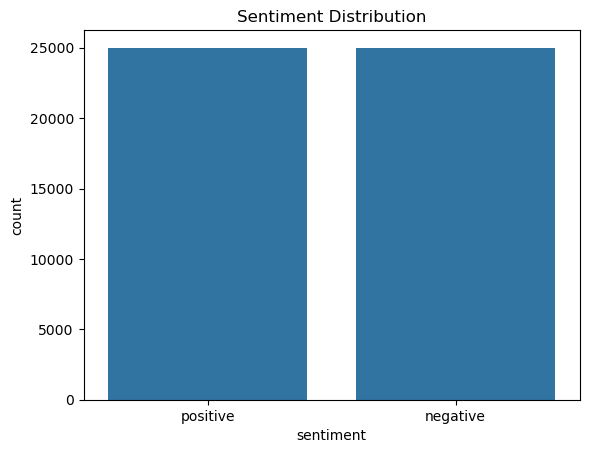

In [5]:
sns.countplot(x='sentiment',data=movie_review)
plt.title("Sentiment Distribution")
plt.show()

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
def wordopt(text):
    #convert into lowercase
    text=text.lower()
    #remove URLs
    text=re.sub(r'https?://\S+|www\.\S+','',text)
    #remove HTML Tags
    text=re.sub(r'<.*?>','',text)
    #remove punctution
    text=re.sub(r'[^\w\s]','',text)
    #remove digits
    text=re.sub(r'\d','',text)
    #remove newline characters
    text=re.sub(r'\n','',text)
    return text

In [8]:
X=[]
text=list(movie_review['review'])
for text in text:
    X.append(wordopt(text))

In [9]:
X[2]

'i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point  risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to lovethis was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanthis may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends'

In [10]:
y=movie_review['sentiment']
y=np.array(list(map(lambda x: 1 if x=='positive' else 0,y)))

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,random_state=42)

In [12]:
word_tokenizer=Tokenizer()
word_tokenizer.fit_on_texts(X_train)

In [13]:
X_train=word_tokenizer.texts_to_sequences(X_train)
X_test=word_tokenizer.texts_to_sequences(X_test)

In [14]:
vocab_length=len(word_tokenizer.word_index)+1
vocab_length

187243

In [15]:
maxlen=200
X_train=pad_sequences(X_train,padding='post',maxlen=maxlen)
X_test=pad_sequences(X_test,padding='post',maxlen=maxlen)

Model Training with:

Artificial Neural Network (ANN) model 

In [16]:
embedding_dim=50
model=Sequential()
model.add(Embedding(input_dim=vocab_length, 
                   output_dim=embedding_dim, 
                   input_length=maxlen))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [17]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [18]:
model.build(input_shape=(None,maxlen))

In [19]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 50)             │       9,362,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,280,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,650,599 (40.63 MB)

 Trainable params: 10,650,599 (40.63 MB)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
history=model.fit(X_train,y_train,
                    batch_size=64,
                    epochs=5,
                    validation_data=(X_test,y_test),
                    verbose=1)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 194ms/step - accuracy: 0.6981 - loss: 0.5304 - val_accuracy: 0.8814 - val_loss: 0.2802
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 196ms/step - accuracy: 0.9618 - loss: 0.1124 - val_accuracy: 0.8615 - val_loss: 0.3870
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 193ms/step - accuracy: 0.9968 - loss: 0.0126 - val_accuracy: 0.8568 - val_loss: 0.6723
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 119s 190ms/step - accuracy: 0.9989 - loss: 0.0038 - val_accuracy: 0.8427 - val_loss: 0.8729
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 189ms/step - accuracy: 0.9972 - loss: 0.0089 - val_accuracy: 0.8489 - val_loss: 0.7511


In [21]:
loss, accuracy=model.evaluate(X_test,y_test,verbose=1)
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8459 - loss: 0.7725
Test Accuracy: 84.89%


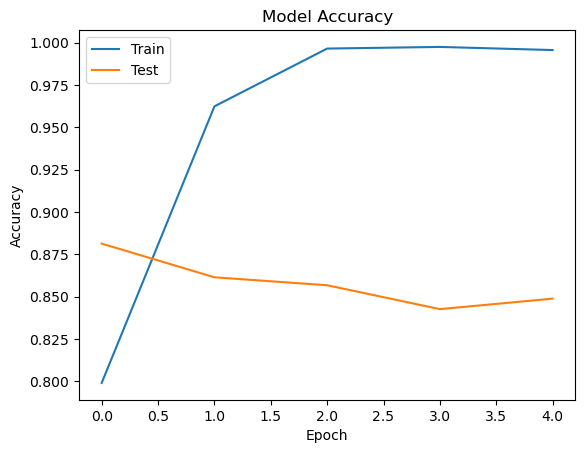

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

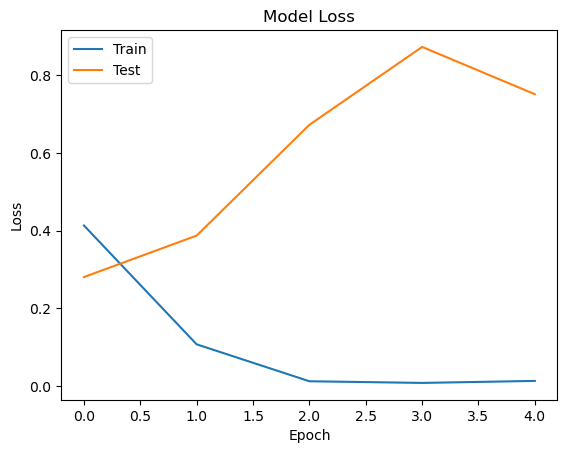

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [24]:
model=Sequential()
model.add(Embedding(input_dim=vocab_length, 
                   output_dim=embedding_dim, 
                   input_length=maxlen))
model.add(GlobalAveragePooling1D())
model.add(Dense(64,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [25]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [26]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [27]:
model.build(input_shape=(None,maxlen))
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 200, 50)             │       9,362,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 50)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,367,527 (35.73 MB)

 Trainable params: 9,367,527 (35.73 MB)

 Non-trainable params: 0 (0.00 B)

None


In [28]:
history=model.fit(X_train,y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test,y_test),
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 204s 160ms/step - accuracy: 0.6763 - loss: 0.6891 - val_accuracy: 0.8692 - val_loss: 0.3241
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 255s 204ms/step - accuracy: 0.8968 - loss: 0.2871 - val_accuracy: 0.8844 - val_loss: 0.2911
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 206s 165ms/step - accuracy: 0.9339 - loss: 0.2074 - val_accuracy: 0.8845 - val_loss: 0.2968
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 162ms/step - accuracy: 0.9524 - loss: 0.1586 - val_accuracy: 0.8750 - val_loss: 0.3667


In [29]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=1)
print(f"Test Accuracy:{accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8717 - loss: 0.3673
Test Accuracy:87.50%


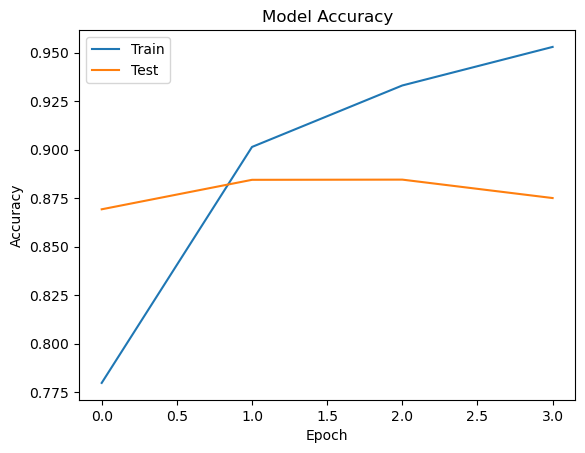

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

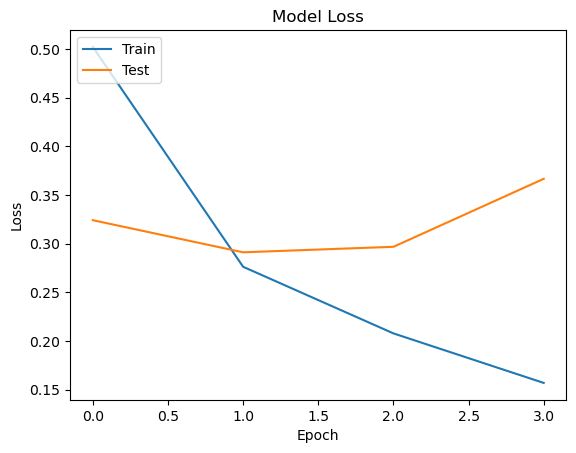

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

Convolutional Neural Network (CNN)

In [32]:
embedding_dim = 100
model=Sequential()
model.add(Embedding(input_dim=vocab_length, 
                   output_dim=embedding_dim, 
                   input_length=maxlen))
model.add(Conv1D(128,5,activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [34]:
model.build(input_shape=(None,maxlen))
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 200, 100)            │      18,724,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 196, 128)            │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,796,749 (71.70 MB)

 Trainable params: 18,796,749 (71.70 MB)

 Non-trainable params: 0 (0.00 B)

None


In [35]:
history=model.fit(X_train,y_train,batch_size=64,epochs=5,validation_data=(X_test,y_test),verbose=1)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 240s 378ms/step - accuracy: 0.6993 - loss: 0.5400 - val_accuracy: 0.8798 - val_loss: 0.2778
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 247s 394ms/step - accuracy: 0.9320 - loss: 0.1881 - val_accuracy: 0.8918 - val_loss: 0.2663
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 237s 378ms/step - accuracy: 0.9884 - loss: 0.0457 - val_accuracy: 0.8879 - val_loss: 0.3212
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 240s 384ms/step - accuracy: 0.9989 - loss: 0.0090 - val_accuracy: 0.8886 - val_loss: 0.4099
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 241s 386ms/step - accuracy: 0.9998 - loss: 0.0024 - val_accuracy: 0.8861 - val_loss: 0.4889


In [36]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=1)
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8847 - loss: 0.4861
Test Accuracy: 88.61%


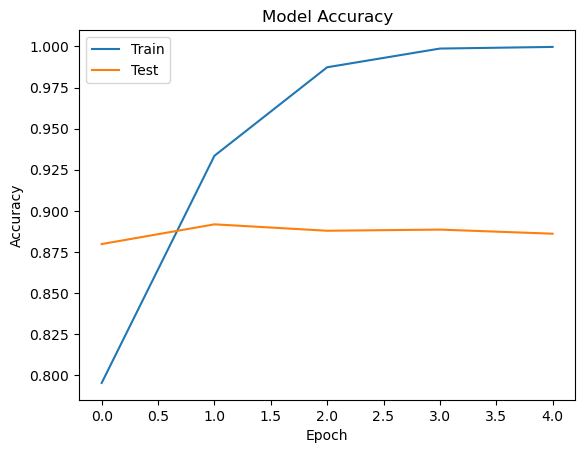

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

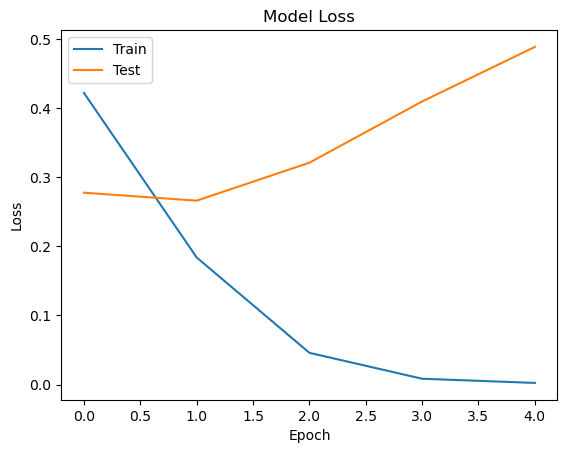

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [39]:
embedding_dim=100
model=Sequential()
model.add(Embedding(input_dim=vocab_length,output_dim=embedding_dim,input_length=maxlen))
model.add(Conv1D(64,5,activation='relu'))  # Reduced filter size
model.add(GlobalMaxPooling1D())
model.add(Dense(64,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.6))  # Increased dropout
model.add(Dense(1,activation='sigmoid'))

In [40]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.build(input_shape=(None,maxlen))
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 200, 100)            │      18,724,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 196, 64)             │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,760,589 (71.57 MB)

 Trainable params: 18,760,589 (71.57 MB)

 Non-trainable params: 0 (0.00 B)

None


In [41]:
early_stop=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)

In [42]:
history=model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_test,y_test),callbacks=[early_stop],verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 230s 358ms/step - accuracy: 0.6844 - loss: 0.5950 - val_accuracy: 0.8772 - val_loss: 0.3069
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 220s 351ms/step - accuracy: 0.9270 - loss: 0.2202 - val_accuracy: 0.8894 - val_loss: 0.2870
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 217s 348ms/step - accuracy: 0.9856 - loss: 0.0796 - val_accuracy: 0.8872 - val_loss: 0.3362
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 415s 664ms/step - accuracy: 0.9978 - loss: 0.0339 - val_accuracy: 0.8888 - val_loss: 0.3767


In [43]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=1)
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8872 - loss: 0.2903
Test Accuracy: 88.94%


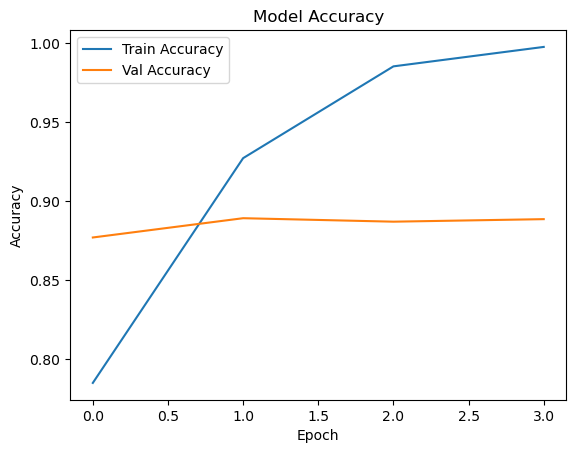

In [44]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

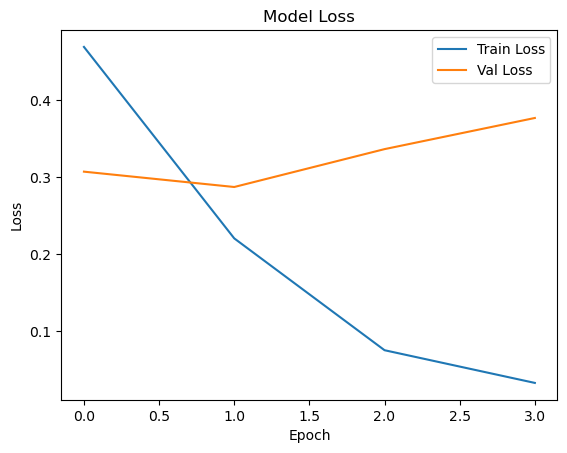

In [45]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

LSTM (Long Short-Term Memory)

In [46]:
embedding_dim=128
model=Sequential()
model.add(Embedding(input_dim=vocab_length,output_dim=embedding_dim,input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [47]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.build(input_shape=(None,maxlen))
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 200, 128)            │      23,967,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 200, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          91,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,065,233 (91.80 MB)

 Trainable params: 24,065,233 (91.80 MB)

 Non-trainable params: 0 (0.00 B)

None


In [48]:
history=model.fit(X_train,y_train,batch_size=64,epochs=5,validation_data=(X_test, y_test),verbose=1)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 481s 753ms/step - accuracy: 0.5461 - loss: 0.6743 - val_accuracy: 0.6209 - val_loss: 0.6038
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 452s 723ms/step - accuracy: 0.6303 - loss: 0.5988 - val_accuracy: 0.6348 - val_loss: 0.5755
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 501s 801ms/step - accuracy: 0.7916 - loss: 0.4789 - val_accuracy: 0.7511 - val_loss: 0.5449
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 506s 810ms/step - accuracy: 0.7880 - loss: 0.4344 - val_accuracy: 0.8723 - val_loss: 0.3171
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 497s 794ms/step - accuracy: 0.9415 - loss: 0.1688 - val_accuracy: 0.8836 - val_loss: 0.3056


In [49]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=1)
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.8811 - loss: 0.3148
Test Accuracy: 88.36%


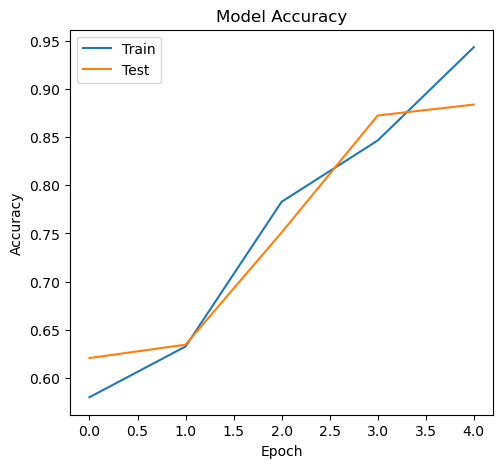

In [50]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')

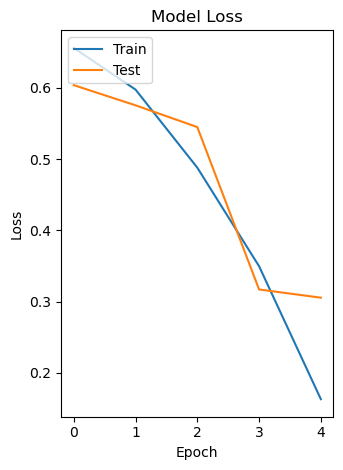

In [51]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],loc='upper left')
plt.tight_layout()
plt.show()

In [52]:
embedding_dim = 128
model=Sequential()
model.add(Embedding(input_dim=vocab_length,output_dim=embedding_dim,input_length=maxlen))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(128,return_sequences=True,dropout=0.3,recurrent_dropout=0.3,kernel_regularizer=l2(0.001))))
model.add(Bidirectional(LSTM(64,dropout=0.3,recurrent_dropout=0.3)))
model.add(Dense(64,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [53]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
model.build(input_shape=(None,maxlen))
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 200, 128)            │      23,967,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_1                  │ (None, 200, 128)            │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 200, 256)            │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,402,945 (93.09 MB)

 Trainable params: 24,402,945 (93.09 MB)

 Non-trainable params: 0 (0.00 B)

None


In [55]:
# Early stopping to prevent overfitting
early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [56]:
history = model.fit(X_train, y_train,batch_size=64,epochs=10,validation_data=(X_test,y_test),callbacks=[early_stop],verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1235s 2s/step - accuracy: 0.6290 - loss: 0.7451 - val_accuracy: 0.7997 - val_loss: 0.5350
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1223s 2s/step - accuracy: 0.7114 - loss: 0.6112 - val_accuracy: 0.8098 - val_loss: 0.4740
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1081s 2s/step - accuracy: 0.8650 - loss: 0.3974 - val_accuracy: 0.8646 - val_loss: 0.3993
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 968s 2s/step - accuracy: 0.9272 - loss: 0.2484 - val_accuracy: 0.8809 - val_loss: 0.3438
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 955s 2s/step - accuracy: 0.9550 - loss: 0.1725 - val_accuracy: 0.8841 - val_loss: 0.3817
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1071s 2s/step - accuracy: 0.9694 - loss: 0.1235 - val_accuracy: 0.8843 - val_loss: 0.3734
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1169s 2s/step - accuracy: 0.9758 - loss: 0.0999 - val_accuracy: 0.8703 - val_loss: 0.4258


In [57]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=1)
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 157ms/step - accuracy: 0.8622 - loss: 0.4381
Test Accuracy: 87.03%


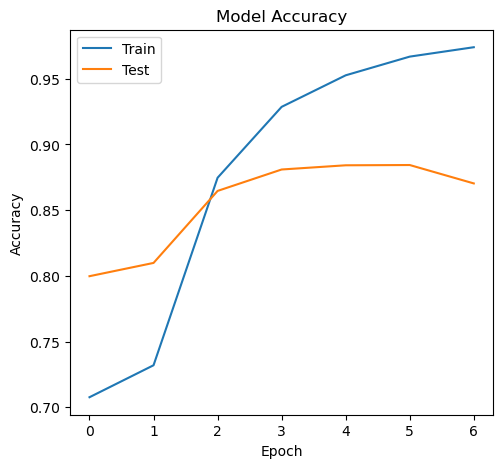

In [58]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')

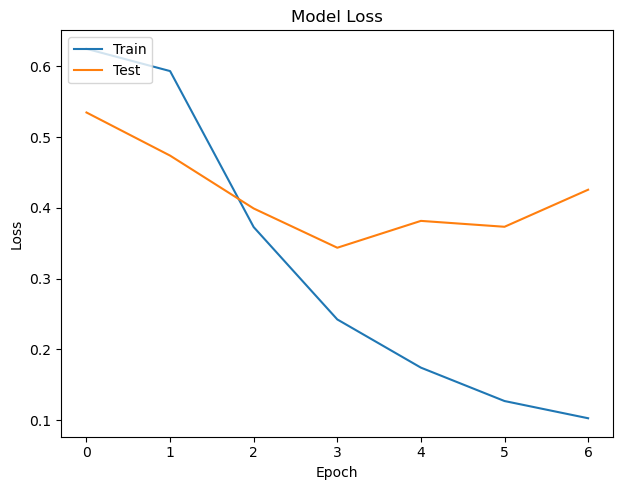

In [61]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.tight_layout()
plt.show()

In [60]:
import pickle
model.save('lstm_sentiment_model.h5') 
with open('word_tokenizer.pickle','wb') as handle:
    pickle.dump(word_tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)